<ipython-input-4-8c5246c3c19b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weather Conditions'] = label_encoder.fit_transform(X['Weather Conditions'])
<ipython-input-4-8c5246c3c19b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Road Type'] = label_encoder.fit_transform(X['Road Type'])
<ipython-input-4-8c5246c3c19b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

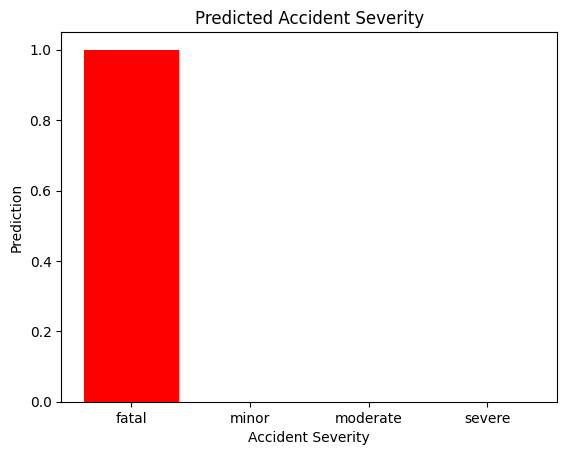

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('accident_data.csv')

X = data[['Speed Limit', 'Weather Conditions', 'Road Type', 'Time of Day', 'Driver Age', 'No of Vehicles Involved']]
y = data['Accident Severity']

label_encoder = LabelEncoder()

X['Weather Conditions'] = label_encoder.fit_transform(X['Weather Conditions'])
X['Road Type'] = label_encoder.fit_transform(X['Road Type'])
X['Time of Day'] = label_encoder.fit_transform(X['Time of Day'])
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

with open('accident_severity_model.pkl', 'wb') as f:
    pickle.dump(model, f)

new_data = pd.DataFrame({'Speed Limit': [30], 'Weather Conditions': [1], 'Road Type': [3], 'Time of Day': [1], 'Driver Age': [30], 'No of Vehicles Involved': [2]})

with open('accident_severity_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predicted_severity = loaded_model.predict(new_data)

predicted_severity_string = label_encoder.inverse_transform(predicted_severity.astype(int))  # Convert to int before inverse transform

severity_levels = label_encoder.classes_
plt.bar(severity_levels, [0] * len(severity_levels))
plt.bar(predicted_severity_string, [1], color='red')
plt.xlabel("Accident Severity")
plt.ylabel("Prediction")
plt.title("Predicted Accident Severity")
plt.show()